In [47]:
import utils
import matplotlib.pyplot as plt

alerts, _ = utils.load_data()
alerts = utils.separate_coords(alerts)

alerts.head(3)

,country,city,reportRating,reportByMunicipalityUser,confidence,reliability,type,uuid,roadType,magvar,subtype,street,pubMillis,endreport,reportDescription,x,y,geometry
0,CI,Antofagasta,1,false,5,10,HAZARD,a123f22e-e5e0-4c6c-8a4e-7434c4fd2110,6,17,HAZARD_ON_ROAD_CONSTRUCTION,Av. República de Croacia,1724417637000,1724425125000,NaN,-70.412429,-23.676846,POINT (-7838275.742 -2714079.538)
1,CI,Antofagasta,0,false,0,5,JAM,1d8df954-e380-4327-8015-f4fbadf74f2d,6,4,JAM_HEAVY_TRAFFIC,Av. Edmundo Pérez Zujovic,1724423878000,1724425125000,NaN,-70.392283,-23.617475,POINT (-7836033.099 -2706864.568)
2,CI,Antofagasta,0,false,0,5,JAM,c53a5bc6-f6b6-44b8-a5bd-af69b60a4580,1,359,,Pasaje El Volcán,1724425406000,1724425125000,NaN,-70.385619,-23.573323,POINT (-7835291.266 -2701501.184)


In [48]:
accidents = utils.extract_event(alerts, ['ACCIDENT'])
jams = utils.extract_event(alerts, ['JAM'])
hazards = utils.extract_event(alerts, ['HAZARD'])

In [49]:
print('Las 10 calles con más accidentes son:')
print(accidents['street'].value_counts().head(10))

Las 10 calles con más accidentes son:
street
Av. Edmundo Pérez Zujovic               126
Av. Pedro Aguirre Cerda                 109
Nicolás Tirado                           35
Av. Grecia                               35
Av. Antonio Rendic                       34
Av. Iquique                              21
Av. Balmaceda                            16
Juan Bolívar                             15
Av. Óscar Bonilla                        14
Circunvalación Padre Alberto Hurtado     14
Name: count, dtype: int64


In [50]:
print('Las 10 calles con más atascos son:')
print(jams['street'].value_counts().head(10))

Las 10 calles con más atascos son:
street
Av. Edmundo Pérez Zujovic    1411
Av. Pedro Aguirre Cerda       439
Av. Grecia                    367
Av. Iquique                   283
Av. Antonio Rendic            241
Av. Balmaceda                 153
Nicolás Tirado                119
Av. Argentina                 112
Av. Óscar Bonilla             106
Av. Salvador Allende           78
Name: count, dtype: int64


In [51]:
print('Las 10 calles con más peligros son:')
print(hazards['street'].value_counts().head(10))

Las 10 calles con más peligros son:
street
Av. Edmundo Pérez Zujovic               380
Av. Pedro Aguirre Cerda                 157
Av. Argentina                           153
Av. Antonio Rendic                      125
Av. Grecia                              121
Circunvalación Padre Alberto Hurtado     74
Av. Balmaceda                            74
Av. Salvador Allende                     65
Av. Séptimo de Línea                     60
Av. Andrés Sabella                       59
Name: count, dtype: int64


In [52]:
utils.freq_nearby(accidents)

,uuid,street,inicio,fin,x,y,geometry,hour,week_day,day_type,freq
4,e87552f7-4572-4096-9fdd-9400ad90e7f8,Irarrázaval,2024-08-23 11:12:19-04:00,2024-08-23 14:58:45-04:00,-70.385121,-23.603942,POINT (-7835235.829 -2705220.449),11,4,s,4
88,dcc53b30-3046-4d56-bc84-29284233f1f0,Díaz Gana,2024-08-23 14:34:02-04:00,2024-08-23 14:58:45-04:00,-70.403283,-23.665486,POINT (-7837257.614 -2712698.778),14,4,s,9
89,2340df84-4283-49c7-91ed-dff4a345b272,Av. Angamos,2024-08-23 14:33:40-04:00,2024-08-23 14:58:45-04:00,-70.403216,-23.665352,POINT (-7837250.155 -2712682.492),14,4,s,9
96,4a3425e5-838a-4a94-acc6-1c2880648355,Av. Edmundo Pérez Zujovic,2024-08-23 14:43:35-04:00,2024-08-23 14:58:45-04:00,-70.396410,-23.628191,POINT (-7836492.515 -2708166.572),14,4,s,9
101,c83aab00-41d5-4795-8314-1bc05e851a4a,Av. Grecia,2024-08-23 15:29:55-04:00,2024-08-23 14:58:45-04:00,-70.402631,-23.654842,POINT (-7837185.033 -2711405.154),15,4,s,5
...,...,...,...,...,...,...,...,...,...,...,...
8558,5dec7627-0a56-4e02-81ed-341ef200ded8,Av. Séptimo de Línea,2024-10-03 21:18:03-03:00,2024-10-03 12:26:02-03:00,-70.396514,-23.641126,POINT (-7836504.092 -2709738.328),21,3,s,4
8560,d94f68c4-7443-4131-9d2e-4d5f14c4ddc1,Los Leones,2024-10-03 21:31:46-03:00,2024-10-03 12:26:02-03:00,-70.377687,-23.603701,POINT (-7834408.28 -2705191.171),21,3,s,4
8561,5ef4652b-0af0-40db-83d4-11e4d4b0ca75,Los Leones,2024-10-03 21:31:20-03:00,2024-10-03 12:26:02-03:00,-70.377558,-23.603141,POINT (-7834393.92 -2705123.141),21,3,s,3
8562,8e0f630e-7f9d-4e26-9e7d-a3301febc3a1,Los Leones,2024-10-03 21:32:11-03:00,2024-10-03 12:26:02-03:00,-70.377746,-23.604942,POINT (-7834414.848 -2705341.933),21,3,s,6


In [53]:
accidents = utils.filter_nearby(accidents)
top10 = accidents[['street', 'freq', 'x', 'y', 'geometry']].sort_values('freq', ascending=False).head(10)

accidents10 = top10.copy()
top10


,street,freq,x,y,geometry
32,Nicolás Tirado,41,-70.388786,-23.591896,POINT (-7835643.815 -2703757.127)
50,Av. Pedro Aguirre Cerda,18,-70.390059,-23.586442,POINT (-7835785.525 -2703094.632)
5,Av. Edmundo Pérez Zujovic,16,-70.396341,-23.591243,POINT (-7836484.834 -2703677.806)
66,Jorge Washington,13,-70.400162,-23.647439,POINT (-7836910.186 -2710505.488)
71,Av. Edmundo Pérez Zujovic,13,-70.393390,-23.584144,POINT (-7836156.33 -2702815.503)
57,Av. Pedro Aguirre Cerda,10,-70.390451,-23.582972,POINT (-7835829.162 -2702673.146)
69,Av. Pedro Aguirre Cerda,10,-70.390902,-23.571555,POINT (-7835879.367 -2701286.452)
95,Av. Iquique,9,-70.394007,-23.629351,POINT (-7836225.014 -2708307.519)
1,Díaz Gana,9,-70.403283,-23.665486,POINT (-7837257.614 -2712698.778)
82,Av. Edmundo Pérez Zujovic,9,-70.395769,-23.637457,POINT (-7836421.159 -2709292.485)


In [54]:
print('Las 10 coordenadas con más accidentes son:')
for _, row in top10.iterrows():
    print(f'{row['y']}, {row['x']}')

Las 10 coordenadas con más accidentes son:
-23.591896, -70.388786
-23.586442, -70.390059
-23.591243, -70.396341
-23.647439, -70.400162
-23.584144, -70.39339
-23.582972, -70.390451
-23.571555, -70.390902
-23.629351, -70.394007
-23.665486, -70.403283
-23.637457, -70.395769


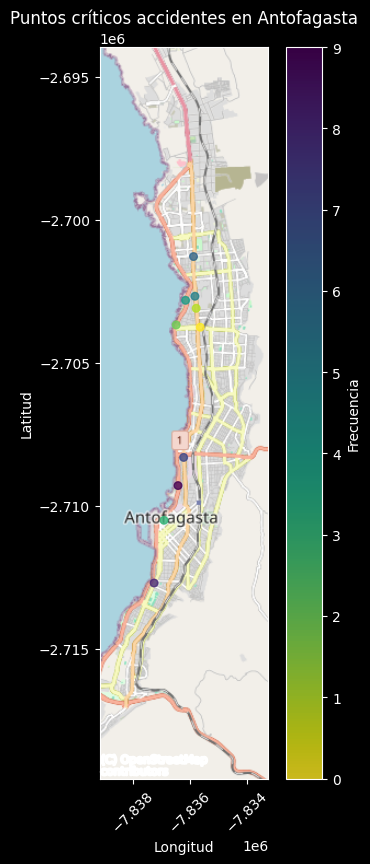

,street,freq,x,y,geometry
32,Nicolás Tirado,41,-70.388786,-23.591896,POINT (-7835643.815 -2703757.127)
50,Av. Pedro Aguirre Cerda,18,-70.390059,-23.586442,POINT (-7835785.525 -2703094.632)
5,Av. Edmundo Pérez Zujovic,16,-70.396341,-23.591243,POINT (-7836484.834 -2703677.806)
66,Jorge Washington,13,-70.400162,-23.647439,POINT (-7836910.186 -2710505.488)
71,Av. Edmundo Pérez Zujovic,13,-70.393390,-23.584144,POINT (-7836156.33 -2702815.503)
57,Av. Pedro Aguirre Cerda,10,-70.390451,-23.582972,POINT (-7835829.162 -2702673.146)
69,Av. Pedro Aguirre Cerda,10,-70.390902,-23.571555,POINT (-7835879.367 -2701286.452)
95,Av. Iquique,9,-70.394007,-23.629351,POINT (-7836225.014 -2708307.519)
1,Díaz Gana,9,-70.403283,-23.665486,POINT (-7837257.614 -2712698.778)
82,Av. Edmundo Pérez Zujovic,9,-70.395769,-23.637457,POINT (-7836421.159 -2709292.485)


In [55]:
MARKERSIZE = 30

fig, ax = utils.plot_map(accidents10, 'Puntos críticos accidentes en Antofagasta', markersize=MARKERSIZE, cmap='viridis_r')
plt.show(fig)
accidents10

In [56]:
utils.freq_nearby(jams)

,uuid,street,inicio,fin,x,y,geometry,hour,week_day,day_type,freq
1,1d8df954-e380-4327-8015-f4fbadf74f2d,Av. Edmundo Pérez Zujovic,2024-08-23 10:37:58-04:00,2024-08-23 14:58:45-04:00,-70.392283,-23.617475,POINT (-7836033.099 -2706864.568),10,4,s,102
2,c53a5bc6-f6b6-44b8-a5bd-af69b60a4580,Pasaje El Volcán,2024-08-23 11:03:26-04:00,2024-08-23 14:58:45-04:00,-70.385619,-23.573323,POINT (-7835291.266 -2701501.184),11,4,s,3
3,53b6ff5f-d078-421d-9f78-03e534d78989,Azapa,2024-08-23 11:07:02-04:00,2024-08-23 14:58:45-04:00,-70.384986,-23.616328,POINT (-7835220.801 -2706725.213),11,4,s,18
5,8514589f-8c10-449f-90ff-656d6f68864b,Coquimbo,2024-08-23 11:40:50-04:00,2024-08-23 14:58:45-04:00,-70.399240,-23.657366,POINT (-7836807.549 -2711711.9),11,4,s,44
7,44751e71-7041-439b-90ca-428d0edc674f,Av. Grecia,2024-08-23 12:05:54-04:00,2024-08-23 14:58:45-04:00,-70.402438,-23.650212,POINT (-7837163.549 -2710842.477),12,4,s,46
...,...,...,...,...,...,...,...,...,...,...,...
8545,d56c5690-6ec0-4ed1-9d9b-922910f96c8f,Av. Pedro Aguirre Cerda,2024-10-03 19:56:18-03:00,2024-10-03 12:26:02-03:00,-70.391009,-23.576996,POINT (-7835891.278 -2701947.294),19,3,s,88
8548,8a0b8c4f-d020-4ebd-aeca-51d5ed8682fc,Av. Edmundo Pérez Zujovic,2024-10-03 20:08:50-03:00,2024-10-03 12:26:02-03:00,-70.395761,-23.637618,POINT (-7836420.269 -2709312.049),20,3,s,97
8550,f9442814-6a8d-414c-b5c6-aafcacfc617e,Mall Plaza Antofagasta,2024-10-03 20:44:13-03:00,2024-10-03 12:26:02-03:00,-70.402153,-23.645952,POINT (-7837131.823 -2710324.784),20,3,s,50
8551,b51d6644-4136-4f5a-87c8-4b430f4c3bc7,Av. Grecia,2024-10-03 20:51:58-03:00,2024-10-03 12:26:02-03:00,-70.402643,-23.648007,POINT (-7837186.369 -2710574.514),20,3,s,50


In [57]:
jams = utils.filter_nearby(jams)

top10 = jams[['street', 'freq', 'x', 'y', 'geometry']].sort_values('freq', ascending=False).head(10)
jams10 = top10.copy()
top10

,street,freq,x,y,geometry
18,Av. Edmundo Pérez Zujovic,154,-70.395696,-23.633673,POINT (-7836413.033 -2708832.681)
45,Nicolás Tirado,137,-70.388978,-23.591899,POINT (-7835665.188 -2703757.492)
54,Av. Edmundo Pérez Zujovic,126,-70.396247,-23.629337,POINT (-7836474.37 -2708305.818)
0,Av. Edmundo Pérez Zujovic,102,-70.392283,-23.617475,POINT (-7836033.099 -2706864.568)
27,Av. Edmundo Pérez Zujovic,97,-70.396441,-23.626434,POINT (-7836495.966 -2707953.087)
16,Av. Grecia,96,-70.402536,-23.652761,POINT (-7837174.458 -2711152.251)
51,Av. Edmundo Pérez Zujovic,95,-70.394657,-23.588255,POINT (-7836297.372 -2703314.853)
15,Av. Edmundo Pérez Zujovic,94,-70.395669,-23.636586,POINT (-7836410.027 -2709186.646)
13,Av. Grecia,92,-70.402506,-23.655789,POINT (-7837171.118 -2711520.244)
29,Mejillones,90,-70.392389,-23.627195,POINT (-7836044.899 -2708045.552)


(<Figure size 450x950 with 2 Axes>,
 <Axes: title={'center': 'Puntos críticos congestión en Antofagasta'}, xlabel='Longitud', ylabel='Latitud'>)

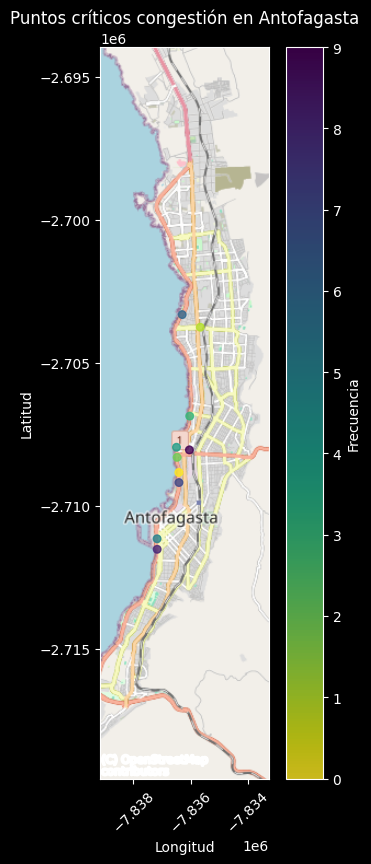

In [58]:
utils.plot_map(jams10, 'Puntos críticos congestión en Antofagasta', markersize=MARKERSIZE, cmap='viridis_r')

In [59]:
print('Las 10 coordenadas con más atascos son:')
for _, row in top10.iterrows():
    print(f'{row['y']}, {row['x']}')

Las 10 coordenadas con más atascos son:
-23.633673, -70.395696
-23.591899, -70.388978
-23.629337, -70.396247
-23.617475, -70.392283
-23.626434, -70.396441
-23.652761, -70.402536
-23.588255, -70.394657
-23.636586, -70.395669
-23.655789, -70.402506
-23.627195, -70.392389


In [60]:
utils.freq_nearby(hazards)

,uuid,street,inicio,fin,x,y,geometry,hour,week_day,day_type,freq
0,a123f22e-e5e0-4c6c-8a4e-7434c4fd2110,Av. República de Croacia,2024-08-23 08:53:57-04:00,2024-08-23 14:58:45-04:00,-70.412429,-23.676846,POINT (-7838275.742 -2714079.538),8,4,s,3
6,cb5046a4-282b-4ec0-a46f-228e3f55a2e5,Av. Antonio Rendic,2024-08-23 11:51:06-04:00,2024-08-23 14:58:45-04:00,-70.386217,-23.621585,POINT (-7835357.835 -2707363.924),11,4,s,11
10,7bb29b98-80ea-4916-8018-a65bc2aee354,Tte. Ernesto Riquelme,2024-08-23 12:05:08-04:00,2024-08-23 14:58:45-04:00,-70.391480,-23.647622,POINT (-7835943.71 -2710527.727),12,4,s,22
16,f470e00b-dbd6-4780-a150-3e75f4675c9a,Av. Balmaceda,2024-08-23 12:16:30-04:00,2024-08-23 14:58:45-04:00,-70.400621,-23.646371,POINT (-7836961.281 -2710375.702),12,4,s,67
19,37d01ed3-78a2-4572-b3bd-ffc095bcd72d,Av. Balmaceda,2024-08-23 12:18:05-04:00,2024-08-23 14:58:45-04:00,-70.400347,-23.646161,POINT (-7836930.78 -2710350.182),12,4,s,66
...,...,...,...,...,...,...,...,...,...,...,...
8557,eabd80dd-759c-4807-a937-b43e262fa0ab,Maipú,2024-10-03 21:14:37-03:00,2024-10-03 12:26:02-03:00,-70.397612,-23.650831,POINT (-7836626.321 -2710917.702),21,3,s,17
8559,ff8e0ec3-c5be-421e-9c5f-e222deb18447,Almirante Juan José Latorre,2024-10-03 21:23:37-03:00,2024-10-03 12:26:02-03:00,-70.396127,-23.647022,POINT (-7836461.011 -2710454.813),21,3,s,14
8564,df5f289a-ab0a-428c-bb56-7f3b7f400cef,Av. Angamos,2024-10-03 22:04:48-03:00,2024-10-03 12:26:02-03:00,-70.403249,-23.665418,POINT (-7837253.829 -2712690.514),22,3,s,20
8565,fdd123db-7822-40c5-921b-feb21c047e12,Av. Angamos,2024-10-03 22:09:15-03:00,2024-10-03 12:26:02-03:00,-70.403216,-23.665352,POINT (-7837250.155 -2712682.492),22,3,s,21


In [61]:
hazards = utils.filter_nearby(hazards)

top10 = hazards[['street', 'freq', 'x', 'y', 'geometry']].sort_values('freq', ascending=False).head(10)
hazards10 = top10.copy()
top10

,street,freq,x,y,geometry
3,Av. Balmaceda,67,-70.400621,-23.646371,POINT (-7836961.281 -2710375.702)
80,Estacionamientos Lider,50,-70.396482,-23.636520,POINT (-7836500.53 -2709178.626)
6,Av. Balmaceda,50,-70.397701,-23.643416,POINT (-7836636.228 -2710016.606)
16,Av. Edmundo Pérez Zujovic,49,-70.396215,-23.590976,POINT (-7836470.808 -2703645.373)
48,Av. Edmundo Pérez Zujovic,47,-70.396223,-23.629707,POINT (-7836471.698 -2708350.776)
14,14 de Febrero,45,-70.393211,-23.650246,POINT (-7836136.404 -2710846.609)
5,Av. Antonio Rendic,40,-70.389409,-23.628164,POINT (-7835713.167 -2708163.291)
28,Av. Grecia,38,-70.402526,-23.652546,POINT (-7837173.345 -2711126.122)
73,Av. Argentina,36,-70.399051,-23.668429,POINT (-7836786.51 -2713056.476)
60,Av. Pedro Aguirre Cerda,35,-70.390832,-23.577568,POINT (-7835871.575 -2702016.768)


(<Figure size 450x950 with 2 Axes>,
 <Axes: title={'center': 'Puntos críticos peligros en Antofagasta'}, xlabel='Longitud', ylabel='Latitud'>)

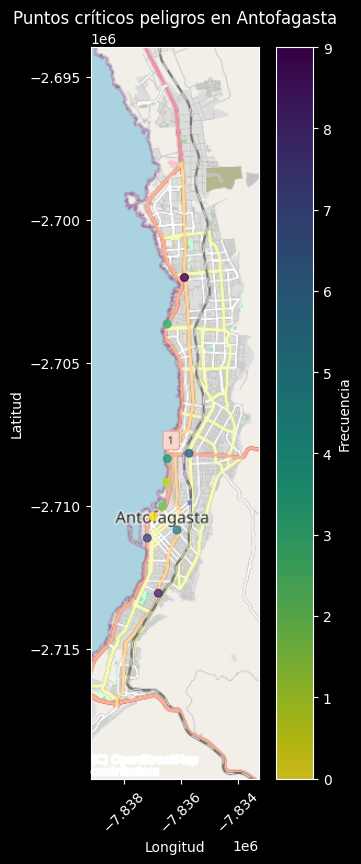

In [64]:
utils.plot_map(hazards10, 'Puntos críticos peligros en Antofagasta', markersize=MARKERSIZE, cmap='viridis_r')

In [63]:
print('Las 10 coordenadas con más peligros son:')
for _, row in top10.iterrows():
    print(f'{row['y']}, {row['x']}')

Las 10 coordenadas con más peligros son:
-23.646371, -70.400621
-23.63652, -70.396482
-23.643416, -70.397701
-23.590976, -70.396215
-23.629707, -70.396223
-23.650246, -70.393211
-23.628164, -70.389409
-23.652546, -70.402526
-23.668429, -70.399051
-23.577568, -70.390832
